# Loan Approval Prediction System

Installing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
# loading the dataset

train = pd.read_csv("data/train.csv")

test = pd.read_csv("data/test.csv")

In [5]:
# making copy of the original data
train_original = train.copy()
test_original = test.copy()

## Basic Data Exploration

In [6]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


- a very few null values, good for us;

- object: Object format means variables are categorical. Categorical variables in our dataset are: Loan_ID, Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status.

- int64: It represents the integer variables. ApplicantIncome is of this format.

- float64: It represents the variable which have some decimal values involved. They are also numerical variables. Numerical variables in our dataset are: CoapplicantIncome, LoanAmount, Loan_Amount_Term, and Credit_History.

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


- same . here too, only few data points are missing;

In [12]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [15]:
print('Training data shape: ', train.shape)

Training data shape:  (614, 13)


In [13]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [16]:
print('Test data shape: ', test.shape)

Test data shape:  (367, 12)


- We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

### Basic EDA 

- Note: Our target variable is "Loan_Status"
- As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

### Loan_Status Column

In [18]:
train["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

- Among 614 Loan_Status : Accepted : 422 Rejected : 192

In [19]:
# Normalize can be set to True to print proportions instead of number 
train["Loan_Status"].value_counts(normalize=True)*100

Loan_Status
Y    68.729642
N    31.270358
Name: proportion, dtype: float64

<Axes: title={'center': 'Loan_Status'}, xlabel='Loan_Status'>

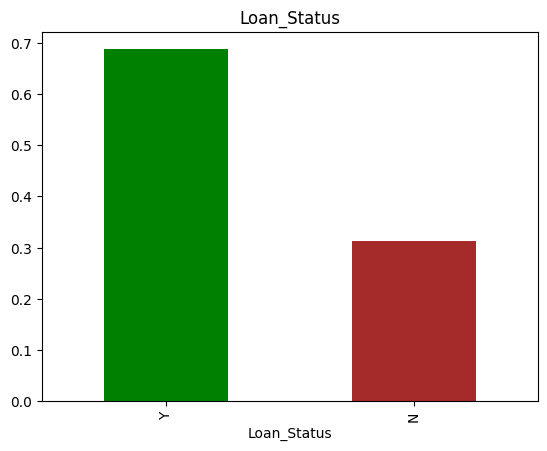

In [23]:
train["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status', color=["Green","Brown"])

The loan of 422(around 68.7%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

#### Now lets check independent Variables too;

### Gender Column

In [24]:
train["Gender"].count()

np.int64(601)

In [25]:
train["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

- Among 601 person: Male : 489 Female : 112

In [27]:
train['Gender'].value_counts(normalize=True)*100

Gender
Male      81.364393
Female    18.635607
Name: proportion, dtype: float64

<Axes: title={'center': 'Gender'}, xlabel='Gender'>

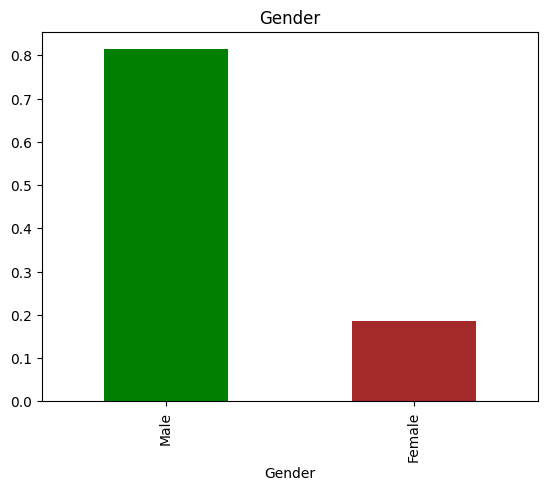

In [31]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender',color=["green","brown"])

- In our train dataset the "Gender" variable contain Male : 81% Female: 19%

### Married Column

In [33]:
train["Married"].count()

np.int64(611)

In [34]:
train["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [35]:
train['Married'].value_counts(normalize=True)*100

Married
Yes    65.139116
No     34.860884
Name: proportion, dtype: float64

<Axes: title={'center': 'Married'}, xlabel='Married'>

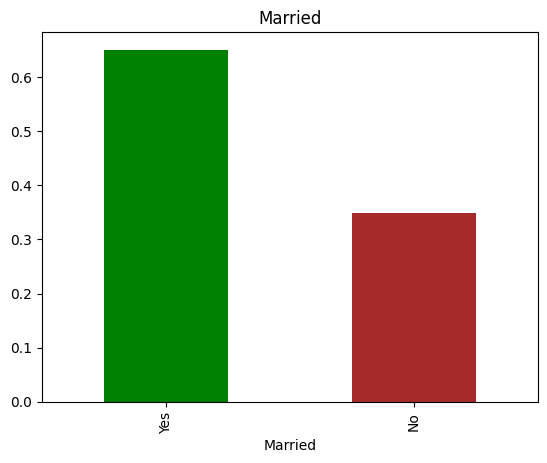

In [40]:
train['Married'].value_counts(normalize=True).plot.bar(title= 'Married',color=["green","brown"])

Number of married people : 65%

Number of unmarried people : 35%

### Self_Employed Column

In [41]:
train["Self_Employed"].count()

np.int64(582)

In [42]:
train["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [43]:
train['Self_Employed'].value_counts(normalize=True)*100

Self_Employed
No     85.910653
Yes    14.089347
Name: proportion, dtype: float64

<Axes: title={'center': 'Self_Employed'}, xlabel='Self_Employed'>

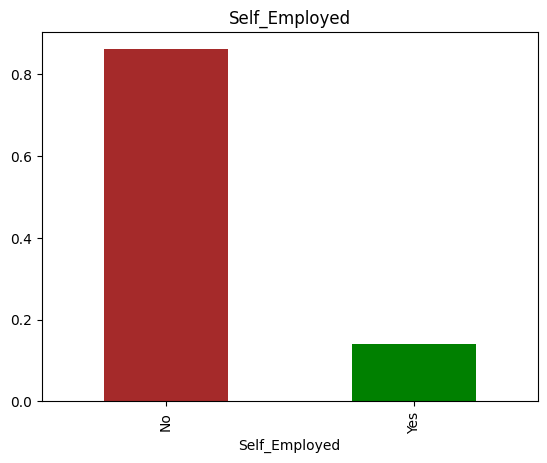

In [47]:
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed',color=["brown","green"])

Woah!
- Among 582 people only 14% are Self_Employed 
- rest of the 86% are Not_Self_Employed